In [1]:
!pip install xarray

In [2]:
!pip install cartopy

     |████████████████████████████████| 10.8 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 22.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 22.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 800 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 2.6 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516305 sha256=83c318197c31659d523188c12a5f15ef8c41b73bf7f45ef306e252dae6ba0414
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


# [Contourf and cartopy issues resolved](https://linuxtut.com/en/8f0d69169dc6ab753e08/)

I was not able to recreate the plot in (d). The error was resolved using the following code.

In [3]:
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get -qq update

deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/


In [4]:
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.17.0

deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease


In [5]:
!pip list | grep Shapely

Shapely                       1.8.1.post1


In [6]:
import xarray as xr
import matplotlib.pyplot as plt # function in matplotlib that produces quick and easy plots
import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point
import numpy as np
import cartopy
import warnings 
warnings.filterwarnings('ignore')

In [18]:
cartopy.__version__
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


## (1) Writing a simple function (including some additional practice with flow control)
### Write a simple function, such that
- You pass a numpy array of four numbers into it – chilly winter temperatures of 20.4, 21.6, 19.8, 22.2 (degrees F, but you don't have to worry about units)
<br><br>
- It will return the maximum value of those numbers
  - Yes, we have actual built-in functions for this - but this is good practice
<br><br>
- You cannot use any pre-existing functions in doing this (except range, arange, etc)
<br><br>
- Do not hardwire anything in this function - this function should also work if you pass in an array of a different size than that of the winter temperatures in this example
<br><br>
- Actually, prove this to me by creating an array of FIVE winter temperatures of your choice and showing me that your function still works!
<br><br>
- For this Q, you will use logical/comparison operations, as well as flow control structures

In [7]:
def max_value(arr):
    max_val = 0
    for i in range(len(arr)):
        if arr[i] > max_val:
            max_val = arr[i]
    return max_val

In [8]:
temp1 = np.array([20.4, 21.6, 19.8, 22.2])
print(max_value(temp1))

22.2


In [9]:
temp2 = np.array([20.4, 21.6, 19.8, 22.2, 21.2])
print(max_value(temp2))

22.2


## (2) Practice with some spatial data using basic Xarray!
- You were just briefly acquainted with the Xarray package this week
<br><br>
- We'll do much more in Xarray in a few weeks, but for now I just want you to start thinking about, and working a bit with, spatial data using this package
<br><br>
- In this Q, you'll read in oceanography data - some metadata here: https://www.metoffice.gov.uk/hadobs/en4/en4-2-2-analysis-file-format.html
<br><br> 
- And evaluate a few basic characteristics of the structure of it, access elements, and then I'll create a plot for you

#### Read in 'EN.4.2.2.f.analysis.g10.202001.nc' - this is a DATASET as there are multiple data variables in it - temperature, salinity, measures of uncertainty for both, etc.

In [11]:
data = xr.open_dataset('EN.4.2.2.f.analysis.g10.202001.nc')

#### (a.)  Print the data variables in this netcdf file, using the specific function (see your Intro to Xarray lesson)

In [12]:
data.data_vars

Data variables:
    temperature                      (time, depth, lat, lon) float32 ...
    salinity                         (time, depth, lat, lon) float32 ...
    temperature_uncertainty          (time, depth, lat, lon) float32 ...
    salinity_uncertainty             (time, depth, lat, lon) float32 ...
    temperature_observation_weights  (time, depth, lat, lon) float32 ...
    salinity_observation_weights     (time, depth, lat, lon) float32 ...
    time_bnds                        (time, bnds) datetime64[ns] ...
    depth_bnds                       (depth, bnds) float32 ...

#### (b.)  Print the coordinates in this netcdf file

In [13]:
data.coords

Coordinates:
  * depth    (depth) float32 5.022 15.08 25.16 ... 4.752e+03 5.051e+03 5.35e+03
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 -79.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * time     (time) datetime64[ns] 2020-01-16T12:00:00

#### (c.)   Let's focus just on temperature. 

- (i.) How many dimensions does temperature have? 

        Ans. 4
<br><br>
- (ii.) What are these dimensions, and in what order are they in this variable's structure?

        Ans. The dimensions in order are (time, depth, lat, lon)
<br><br>
- (iii.) Access just the temperature data for the first and only time, and the first depth (aka, the vertical level of 5 m below the surface), but all latitudes and longitudes and save it to a new variable called 'temperature'.  
   - Do this using NumPy array indexing!  
   - Later, we'll use special functionality for indexing in Xarray that will allow us to no longer need to keep track of dimension order :)
<br><br>

**NOTES**
- Keep in mind: if a dimension is of length ONE, that would technically not count towards your total # of dimensions. BUT, when you index this variable in (iii.), you'll use '0' to access the one and only value of this 'dimension of length 1', since it is still part of the temperature data structure

In [14]:
data['temperature'][0][0]

<xarray.DataArray 'temperature' (lat: 173, lon: 360)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [270.8986 , 270.8844 , 270.87384, ..., 270.89236, 270.89273, 270.89426],
       [271.1029 , 271.10422, 271.10413, ..., 271.1012 , 271.10117, 271.10156],
       [271.27527, 271.2756 , 271.27515, ..., 271.27475, 271.27448, 271.27466]],
      dtype=float32)
Coordinates:
    depth    float32 5.022
  * lat      (lat) float32 -83.0 -82.0 -81.0 -80.0 -79.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
    time     datetime64[ns] 2020-01-16T12:00:00
Attributes:
    long_name:      temperature
    standard_name:  sea_water_potential_temperature
    units:          kelvin
    valid_min:      -5.0
    valid_max:      45.0

In [15]:
temperature = data['temperature'][0, 0, :, :]
print(temperature.shape)

(173, 360)


#### (d.)  I create your contour plot of Jan 2020 average temperature at depth = 5 m on a map for you. 
#### YOUR TASK: CAREFULLY REVIEW EACH STEP OF THIS AND ASK IF ANYTHING IS UNCLEAR AS YOU'LL BE DOING SOMETHING VERY SIMILAR ON YOUR WEEK 5 ASSIGNMENT!  PLEASE ALSO CAREFULLY WATCH YOUR 2D PLOTTING, PART II LESSON, OR RE-WATCH. MAPPING IS IMPORTANT STUFF!

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:238: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  src_crs, self)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the lengt

Text(0.5, 1.0, 'Ocean temperature at 5 m below the surface, Jan 2020')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:224: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  return cartopy.trace.project_linear(geometry, src_crs, self)


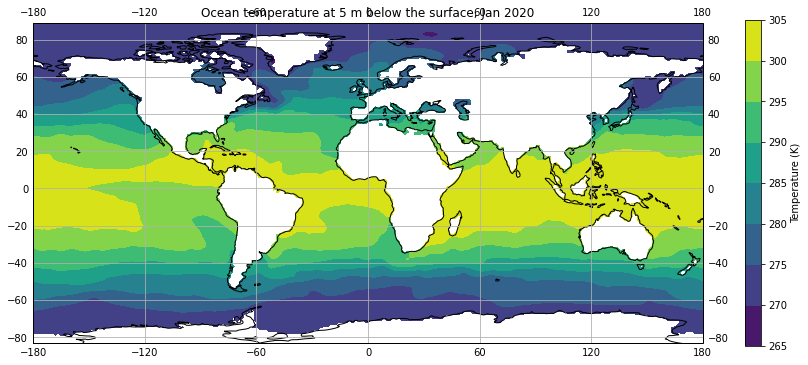

In [15]:
proj=ccrs.PlateCarree() # this is a very common projection, but not the only one!

#Create a figure with an axes object on which we will plot. Pass the projection to that axes
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

# Grab our lat and lon coordinate variables from the Netcdf file
lon = data['lon']
lat = data['lat'] 

# Add cyclic point since there's a data gap in this data set at the Prime Meridian
temperature2, lon2 = add_cyclic_point(temperature, coord=lon)
# use a new variable for our now-modified temperature and longitude variables b/c if we don't and re-run just this cell
# multiple times, you'll keep adding a longitude point (oops!)

# Create our grid
# contourf needs this so it understands the grid it is plotting on
X, Y = np.meshgrid(lon2, lat) # using our slightly modified longitude

# Create our contour plot!
cs = ax.contourf(X,Y,temperature2,transform=proj) # good practice to also specify the transform, as otherwise
                                                  # Cartopy assumes your transform is whatever your projection is
                                                  # this may not always be true
                                                  # more on this later

# Create our colorbar
cb=fig.colorbar(cs,shrink=0.4) # shrink option does what it sounds like to the colorbar!
cb.set_label("Temperature (K)") # set the colorbar label
# The temperature is in Kelvin

# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()

# Add a title!
ax.set_title('Ocean temperature at 5 m below the surface, Jan 2020')